In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ast import literal_eval
from utils import text_values_count

In [2]:
data_path = '../parsed/lemmatized.csv'

In [3]:
df = pd.read_csv(data_path, parse_dates=['dtm'], converters={"tags": literal_eval}) 
# let's see how df looks and get some basic info
print (df)

             id  data-story-long  rating meta-rating  author_id  comments  \
0       7337284             True  7727.0    7884:157    1002684       479   
1       7337282             True    15.0       25:10    2008181         6   
2       7337254             True    28.0       39:11    2522374         2   
3       7337245             True     6.0       18:12    3073815        13   
4       7337246             True    21.0        28:7    3156206         8   
...         ...              ...     ...         ...        ...       ...   
135371  7185786             True    63.0        72:9    2660666        23   
135372  7185784             True  2080.0    2333:253    2456769       487   
135373  7185777             True     1.0        10:9    2940548        15   
135374  7185769             True  8712.0    8882:170    2423817       782   
135375  7185759             True    18.0        19:1     899515         1   

                              dtm  views  saves       author_name  \
0     

In [4]:
df.count()

id                 135376
data-story-long    135376
rating             132849
meta-rating        135376
author_id          135376
comments           135376
dtm                134985
views                   0
saves              135376
author_name        135376
title              135376
tags               135376
text               135376
dtype: int64

In [5]:
# Well, there are no views in dataset, pikubu doesn't return it within html response when using search. 
# Instead it shows something like "Loading views count...", guess this loading is being made by js
# Let's drop this column
df.drop(columns=["views"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135376 entries, 0 to 135375
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               135376 non-null  int64  
 1   data-story-long  135376 non-null  bool   
 2   rating           132849 non-null  float64
 3   meta-rating      135376 non-null  object 
 4   author_id        135376 non-null  int64  
 5   comments         135376 non-null  int64  
 6   dtm              134985 non-null  object 
 7   saves            135376 non-null  int64  
 8   author_name      135376 non-null  object 
 9   title            135376 non-null  object 
 10  tags             135376 non-null  object 
 11  text             135376 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 11.5+ MB


array([[<AxesSubplot:title={'center':'dtm'}>]], dtype=object)

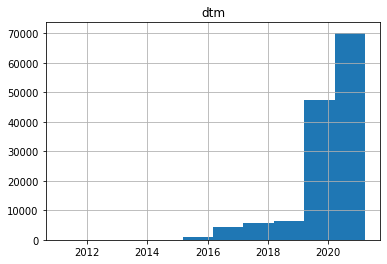

In [6]:
# let's see how posts are distributed by datetime
filtered_dtm = pd.DataFrame(df[~pd.isnull(df["dtm"])]["dtm"].apply(lambda x: x.replace(tzinfo=None)))
filtered_dtm.hist()

In [7]:
# let's delete things that we don't need anymore to save some ram
del filtered_dtm

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

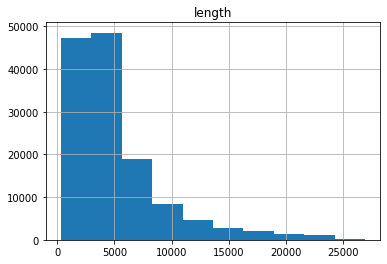

In [8]:
# and by lengths
df["length"] = np.array(df["text"].apply(len))
df.hist("length")

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

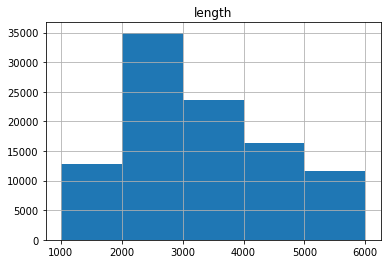

In [9]:
df.hist("length", bins=[1000, 2000, 3000, 4000, 5000, 6000])  # double check that there are no texts below 2000 characters

In [10]:
df["length"].describe()

count    135376.000000
mean       5243.407280
std        4115.548171
min         321.000000
25%        2549.000000
50%        3813.000000
75%        6220.000000
max       26911.000000
Name: length, dtype: float64

In [11]:
# let's grab tags frequency and make hist out of them
df_tags = pd.DataFrame([tag.lower() for tag_list in df["tags"] for tag in tag_list])
tags_counts = df_tags.value_counts()

figsize = 20, 5  # declare this for further hists

len(tags_counts)  # uniue tags

46325

<AxesSubplot:xlabel='0'>

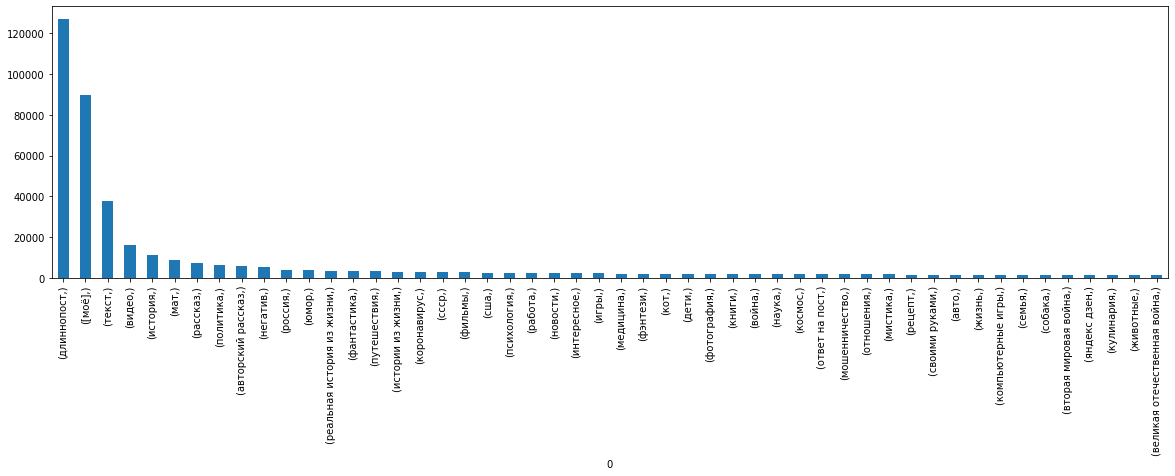

In [12]:
tags_counts[:50].plot(kind='bar', figsize=figsize)

<AxesSubplot:xlabel='0'>

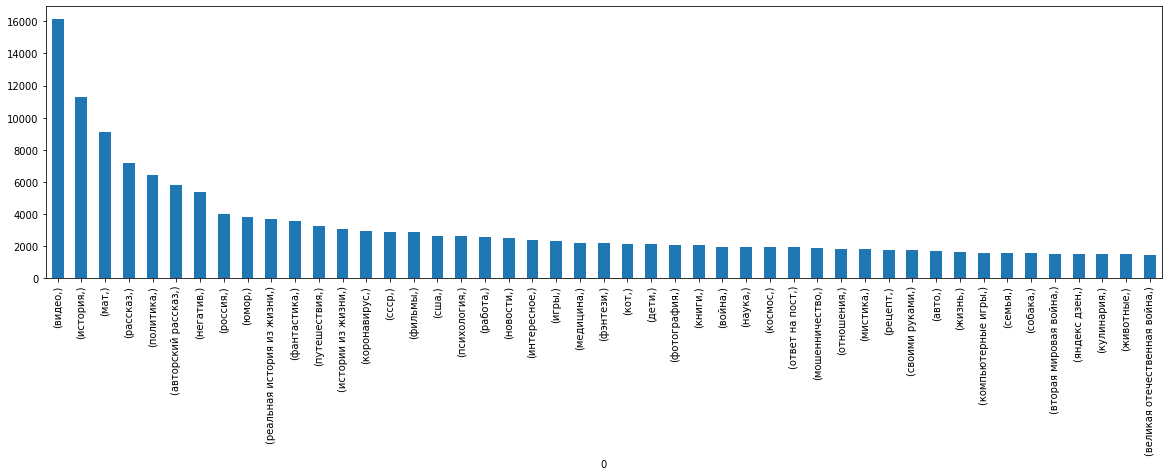

In [13]:
tags_counts[3:50].plot(kind='bar', figsize=figsize)  # now let's take a closer look at the same hist but without first 3 tags

<AxesSubplot:xlabel='0'>

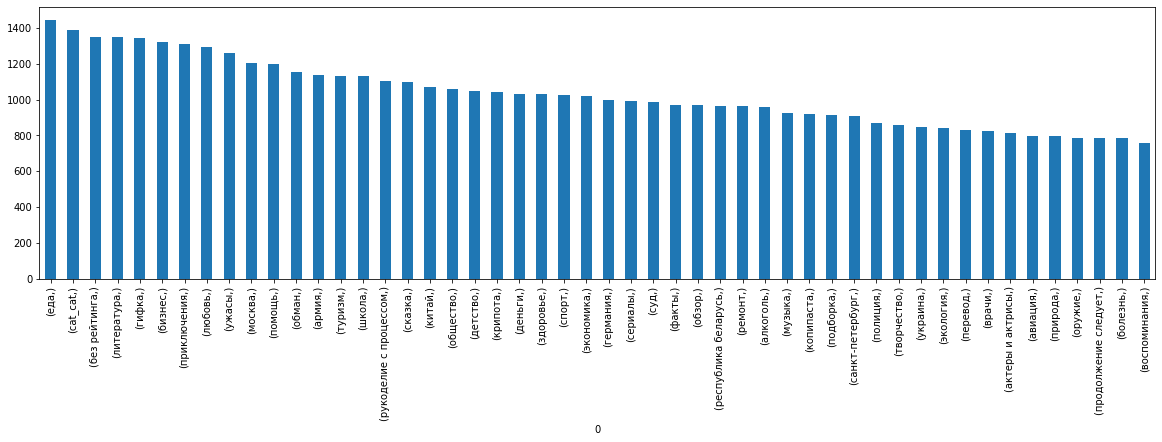

In [14]:
tags_counts[50:100].plot(kind='bar', figsize=figsize)

In [15]:
del tags_counts
del df_tags

In [16]:
# and let's make hists for words from titles and bodies too, why not
df_titles = pd.DataFrame([word.lower() for title in df["title"] for word in title.split(" ")])
titles_counts = df_titles.value_counts()
titles_counts  # very dirty

в                     24631
и                     20684
как                   14163
на                    13882
с                      7949
                      ...  
заграница?                1
заграницей?!              1
заграницу                 1
заграницу(венгрия)        1
™                         1
Length: 185803, dtype: int64

<AxesSubplot:xlabel='0'>

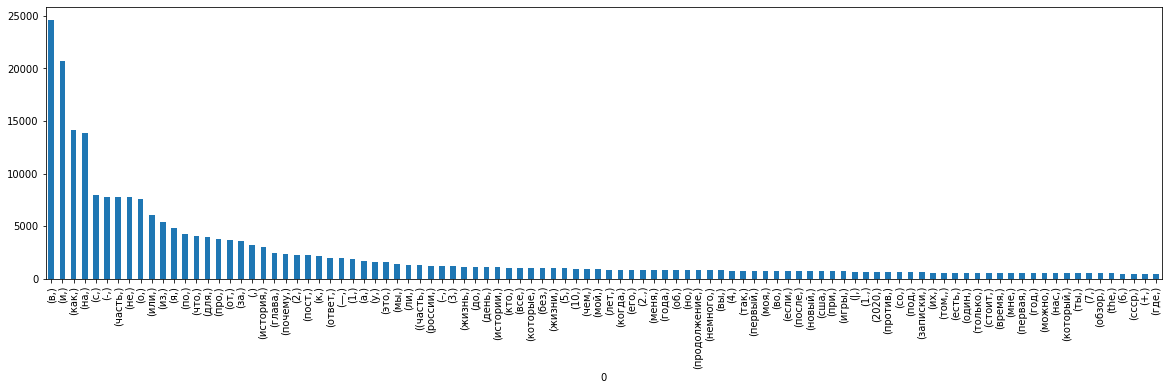

In [17]:
titles_counts[:100].plot(kind='bar', figsize=figsize)

In [18]:
del titles_counts
del df_titles

In [19]:
r = text_values_count(df["text"])
s = pd.Series(r, name="count")

<AxesSubplot:>

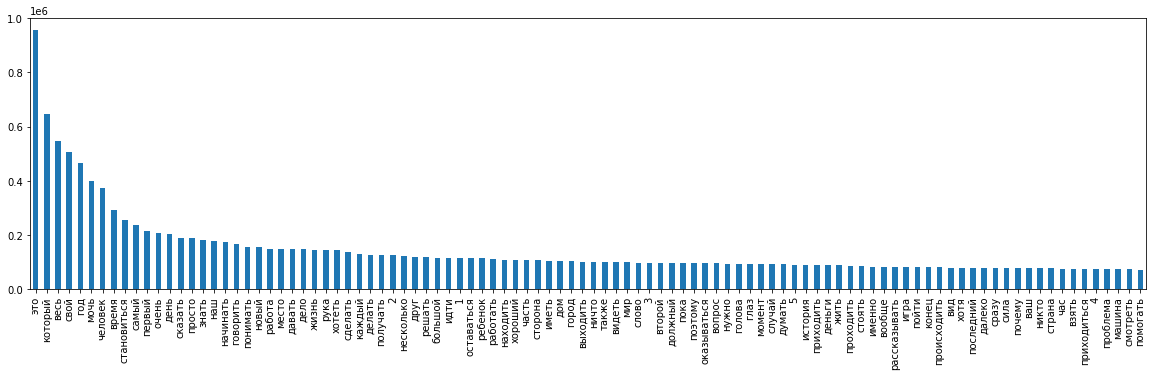

In [20]:
s.sort_values(ascending=False)[:100].plot(kind='bar', figsize=figsize)

In [21]:
len(s)  # number of unique words

759677

In [22]:
# now let's see how rating is distributed
df["rating"].describe()

count    132849.000000
mean        280.610814
std        1053.364702
min       -4918.000000
25%           5.000000
50%          24.000000
75%         133.000000
max       35395.000000
Name: rating, dtype: float64

<AxesSubplot:>

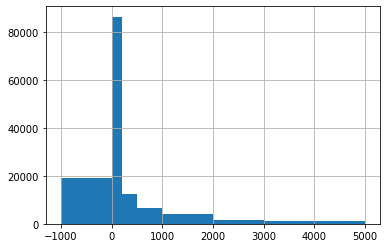

In [23]:
df["rating"].hist(bins=[-1000, 0, 200, 500, 1000, 2000, 3000, 5000])

## Additional pictures from previous experiments
Words count distribution comparison:

![Initial data (10000 posts)](pics/initial_data.jpg)

Raw data (10000 posts)

![Lemmatized data](pics/lem.jpg)

Lemmatized data

![Stemmatized data](pics/stem.jpg)

Stemmatized data

# Conclusion
There is no much difference between data after lemmatization and stemming operations performed and either of them makes data clean enough to continue the work. Stemming results are not great though so we'll be using lemmatized data with stop words removed in further tasks. As we're planning to use Bag of Words model this approach should be sufficient. It also makes sense to throw away too common words (and maybe rare too) as they most likely won't give any useful information.